<a href="https://colab.research.google.com/github/jobindj/ISB2021/blob/main/ISB_Workshop_2021_Cronin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<img src="https://media.isb2021.com/2020/04/ISB2021.jpg" width="200">

# Computer Vision applications in biomechanics
## Neil Cronin @NeilJCronin84

## Part 1: Object detection and image segmentation

First we will use Detectron by Facebook Research to isolate various objects in an image.

***
**BEFORE WE START: from the dropdown menu above select 'Runtime' and then 'change runtime type', and check that you have 'GPU' selected.**
***

# First we need to install some packages. We'll need PyTorch and detectron2




NOTE: In all cases in this workshop, packages are only downloaded temporarily to your colab space, so no space is used on your hard drive

In [ ]:
!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:31tcmalloc: large alloc 1147494400 bytes == 0x557a82d90000 @  0x7f66a529f615 0x557a4873802c 0x557a4881817a 0x557a4873ae4d 0x557a4882cc0d 0x557a487af0d8 0x557a487a9c35 0x557a4873c73a 0x557a487aef40 0x557a487a9c35 0x557a4873c73a 0x557a487ab93b 0x557a4882da56 0x557a487aafb3 0x557a4882da56 0x557a487aafb3 0x557a4882da56 0x557a487aafb3 0x557a4873cb99 0x557a4877fe79 0x557a4873b7b2 0x557a487aee65 0x557a487a9c35 0x557a4873c73a 0x557a487ab93b 0x557a487a9c35 0x557a4873c73a 0x557a487aab0e 0x557a4873c65a 0x557a487aad67 0x557a487a9c35
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:26tcmalloc: large alloc 1434370048 bytes == 0x557ac73e6000 @  0x7f66a529f615 0x557a4873802c 0x557a4881817a 0x557a4873ae4d 0x557a4882cc0d 0x557a487af0d8 0x557a487a9c35 0x557a4873c73a 0x557a487aef40 0x557a487a9c35 0x557a4873c73a 0x557a487ab93b 0x557a4882da56 0x557a487aaf

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html
!pip install pyyaml==5.1

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html
     |████████████████████████████████| 6.8 MB 5.3 MB/s 
     |████████████████████████████████| 130 kB 7.8 MB/s 
     |████████████████████████████████| 74 kB 3.6 MB/s 
     |████████████████████████████████| 144 kB 35.9 MB/s 
     |████████████████████████████████| 49 kB 8.1 MB/s 
     |████████████████████████████████| 721 kB 38.2 MB/s 
     |████████████████████████████████| 743 kB 59.0 MB/s 
     |████████████████████████████████| 636 kB 63.1 MB/s 
     |████████████████████████████████| 112 kB 71.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210722-py3-none-any.whl size=60612 sha256=2f92c5a05117ab0e8a759126cfe3b517908c2b5ec841f06894949fde837e35ac
  Stored in directory: /root/.cache/pip/wheels/a6/99/bf/2ee4e2098402c3b918173613ff34384b0185e87198af9d44f9
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141229 sha256=5a3f4

     |████████████████████████████████| 274 kB 8.9 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44091 sha256=12038b9b22fa2eb70260088370e672b5696a6d7c586c8844bf99cf71ce3e989f
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [ ]:
# Check a few settings before proceeding: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

assert torch.__version__.startswith("1.8")   # Check we have the right version

1.8.1+cu111 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
#!nvidia-smi

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

(You can choose another one from here: https://cocodataset.org/#explore - just paste the new url in place of the existing one)

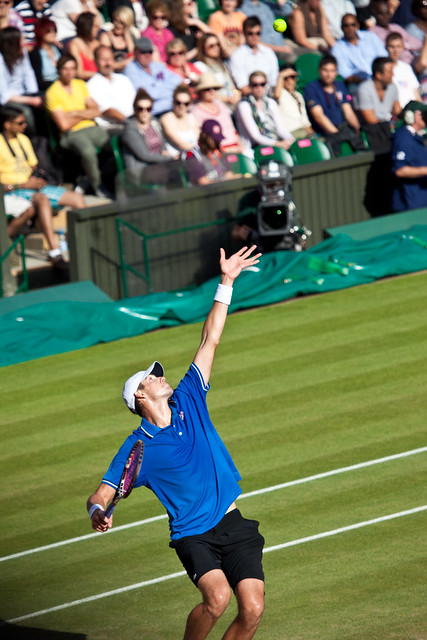

In [ ]:
!wget http://farm9.staticflickr.com/8291/7858653056_bd03e746f9_z.jpg -q -O input.jpg
im = cv2.imread("./input.jpg") # We use opencv to read/show the image
cv2_imshow(im)

Now let's create a detectron2 configuration and a detectron2 `DefaultPredictor` so that we can process ('run inference on') this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:01, 89.2MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
# Let's look at the outputs. 
# See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print('PREDICTED CLASSES:')
print('')
print(outputs["instances"].pred_classes)
print('')
print('BOUNDING BOX LOCATIONS:')
print('')
print(outputs["instances"].pred_boxes)

PREDICTED CLASSES:

tensor([ 0, 38,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 56,  0], device='cuda:0')

BOUNDING BOX LOCATIONS:

Boxes(tensor([[8.8598e+01, 2.3902e+02, 2.7136e+02, 6.3545e+02],
        [1.0725e+02, 4.3674e+02, 1.4674e+02, 5.1193e+02],
        [3.8985e+02, 1.0120e+02, 4.2534e+02, 2.1214e+02],
        [2.7287e+02, 1.8184e+01, 2.8733e+02, 3.2351e+01],
        [4.4471e+01, 5.3773e+01, 1.1932e+02, 1.9782e+02],
        [2.8372e-01, 1.0297e+02, 9.6229e+01, 2.6046e+02],
        [3.5430e+02, 5.5985e+01, 4.0135e+02, 2.1357e+02],
        [3.0314e+02, 5.3143e+01, 3.6446e+02, 1.5467e+02],
        [1.2207e+02, 9.0064e+01, 1.8771e+02, 1.8466e+02],
        [2.7462e+02, 6.5550e+01, 3.2239e+02, 1.4390e+02],
        [2.3476e+02, 7.2200e+01, 2.9747e+02, 1.5436e+02],
        [1.8372e+02, 1.2340e+02, 2.4425e+02, 1.8675e+02],
        [2.2985e+02, 1.5505e+01, 2.8126e+02, 9.4810e+01],
        [1.8684e+02, 8.5024e+01, 2.4806e+02, 1.6436e+02],
        [8.618

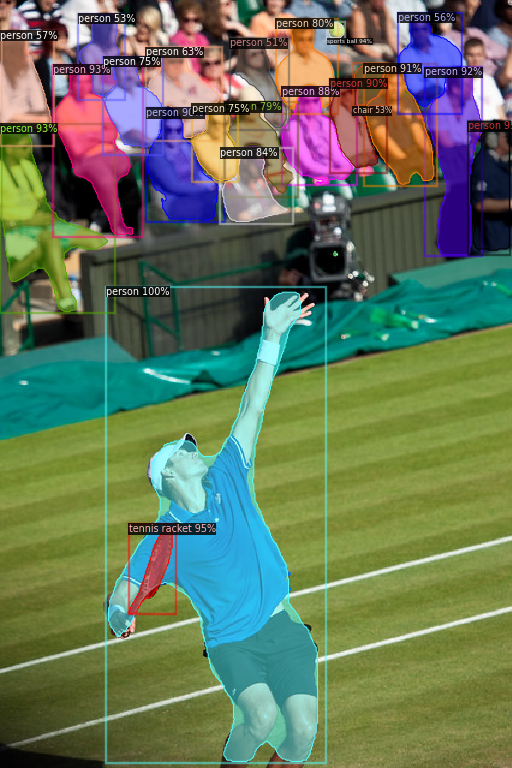

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

NOTE THAT EACH DETECTED OBJECT IS ASSIGNED A CONFIDENCE SCORE (%)

# We might also want to detect specific body parts (more on this later):

model_final_a6e10b.pkl: 237MB [00:03, 71.9MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


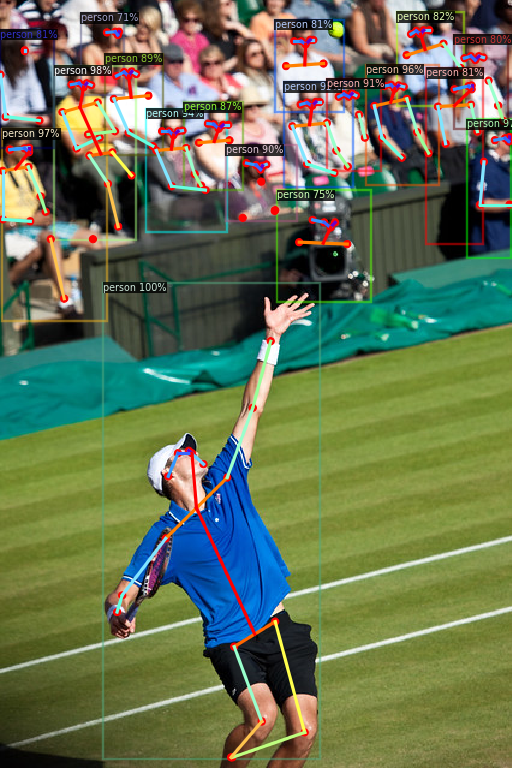

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

NOTE THE CAMERA OPERATOR!

In [ ]:
# To manipulate the predictions for further calculations you can access the 'outputs' variable
outputs

{'instances': Instances(num_instances=18, image_height=640, image_width=427, fields=[pred_boxes: Boxes(tensor([[8.6073e+01, 2.3554e+02, 2.6698e+02, 6.3247e+02],
         [4.5363e+01, 5.4749e+01, 1.1315e+02, 1.9973e+02],
         [2.0711e+00, 1.0738e+02, 8.8897e+01, 2.6732e+02],
         [3.8916e+02, 9.9550e+01, 4.2595e+02, 2.1538e+02],
         [3.0536e+02, 5.3894e+01, 3.6586e+02, 1.5455e+02],
         [2.3645e+02, 6.8222e+01, 2.9383e+02, 1.5563e+02],
         [1.2202e+02, 9.0477e+01, 1.8910e+02, 1.9332e+02],
         [2.7237e+02, 6.5433e+01, 3.1770e+02, 1.4217e+02],
         [1.8810e+02, 1.2088e+02, 2.4779e+02, 1.8446e+02],
         [8.7164e+01, 4.4963e+01, 1.3620e+02, 1.2943e+02],
         [1.5342e+02, 8.5222e+01, 2.0264e+02, 1.5852e+02],
         [3.3059e+02, 1.0055e+01, 3.8678e+02, 8.8348e+01],
         [2.0662e-01, 2.4663e+01, 4.5289e+01, 1.2361e+02],
         [3.5516e+02, 5.6540e+01, 4.0232e+02, 2.0329e+02],
         [2.2905e+02, 1.6464e+01, 2.8630e+02, 9.3180e+01],
         [3.7

# Next we'll run inference with a panoptic segmentation model
# Here we detect objects AND individual instances of objects in the same image

model_final_cafdb1.pkl: 261MB [00:03, 65.2MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


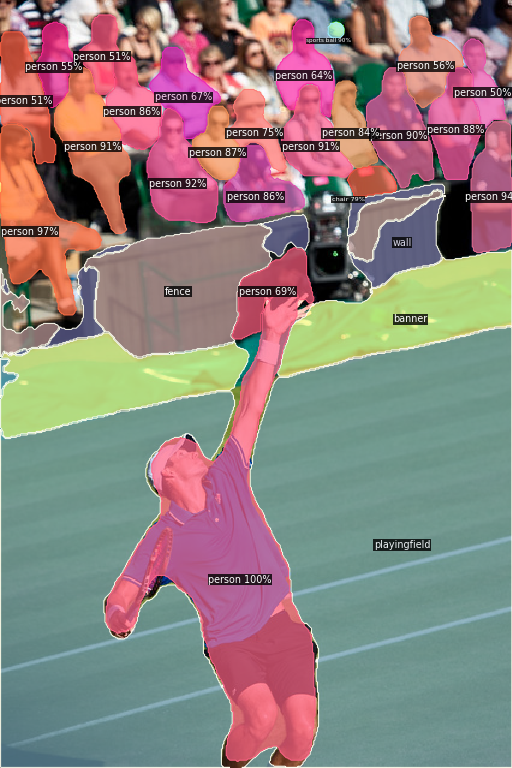

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

Take away:



*   With existing (i.e. pre-trained) models we can automatically extract information from images
*   This includes the detection of people and objects
*   We can use this information to improve scene understanding
*   The same techniques can also be applied to videos 



--

# Part 2
## Tracking multiple people in videos using YOLOv3 / DeepSORT

Here we will use the open source project [ZQPei/deep_sort_pytorch](https://github.com/ZQPei/deep_sort_pytorch) which combines [DeepSORT](https://github.com/nwojke/deep_sort) with [YOLOv3](https://pjreddie.com/darknet/yolo/).

## Install ZQPei/deep_sort_pytorch

In [ ]:
import os
from os.path import exists, join, basename

project_name = "deep_sort_pytorch"
if not exists(project_name):
  # clone and install
  !git clone -q --recursive https://github.com/ZQPei/deep_sort_pytorch.git
  
import sys
sys.path.append(project_name)

import IPython
from IPython.display import clear_output

## Download pretrained model/weights

In [ ]:
yolo_pretrained_weight_dir = join(project_name, 'detector/YOLOv3/weight/')
if not exists(join(yolo_pretrained_weight_dir, 'yolov3.weights')):
  !cd {yolo_pretrained_weight_dir} && wget -q https://pjreddie.com/media/files/yolov3.weights
    
deepsort_pretrained_weight_dir = join(project_name, 'deep_sort/deep/checkpoint')
if not exists(join(deepsort_pretrained_weight_dir, 'ckpt.t7')):
  file_id = '1_qwTWdzT9dWNudpusgKavj_4elGgbkUN'
  !cd {deepsort_pretrained_weight_dir} && curl -Lb ./cookie "https://drive.google.com/uc?export=download&id={file_id}" -o ckpt.t7

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    152      0 --:--:--  0:00:02 --:--:--   151
100 43.9M    0 43.9M    0     0  14.4M      0 --:--:--  0:00:03 --:--:-- 14.4M


## Track people in a video

First let's download a test video (I used open source pedestrian camera data):

In [ ]:
VIDEO_URL = 'https://motchallenge.net/sequenceVideos/MOT20-07-raw.webm'
DURATION_S = 20  # process only the first 20 seconds

video_file_name = 'video2.mp4'
if not exists(video_file_name):
  !wget -q $VIDEO_URL
  dowloaded_file_name = basename(VIDEO_URL)
  # convert to MP4, because we can show only MP4 videos in the colab noteook
  !ffmpeg -y -loglevel info -t $DURATION_S -i $dowloaded_file_name $video_file_name
  

def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))
 
clear_output()
show_local_mp4_video('video2.mp4')

This cell output is too large and can only be displayed while logged in.


Now, track the pedestrians on the downloaded video:

In [ ]:
!cd {project_name} && python yolov3_deepsort.py ../video2.mp4 --save_path ../output.avi

/content/deep_sort_pytorch/utils/parser.py:23: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.update(yaml.load(fo.read()))
2021-07-25 11:16:50 [INFO]: Loading weights from ./detector/YOLOv3/weight/yolov3.weights... Done!
2021-07-25 11:16:54 [INFO]: Loading weights from ./deep_sort/deep/checkpoint/ckpt.t7... Done!
2021-07-25 11:16:55 [INFO]: Save results to ../output.avi
2021-07-25 11:16:55 [INFO]: time: 0.504s, fps: 1.986, detection numbers: 24, tracking numbers: 0
2021-07-25 11:16:55 [INFO]: time: 0.100s, fps: 9.993, detection numbers: 23, tracking numbers: 0
2021-07-25 11:16:55 [INFO]: time: 0.093s, fps: 10.736, detection numbers: 22, tracking numbers: 21
2021-07-25 11:16:55 [INFO]: time: 0.098s, fps: 10.209, detection numbers: 23, tracking numbers: 21
2021-07-25 11:16:55 [INFO]: time: 0.079s, fps: 12.594, detection numbers: 21, tracking numbers: 22
2021-07-25 11:

Then we can visualise the result:

In [ ]:
# first convert to mp4 to show in a Colab notebook
%cd output.avi
!ffmpeg -y -loglevel quiet -i results.avi output2.mp4
show_local_mp4_video("output2.mp4", width=960, height=720)

This cell output is too large and can only be displayed while logged in.


Take away:

*   Multiple people can be tracked over time
*   This is simpler with fewer people!



--

# Part 3
## Pose Detection with HRNet

Here we will use an open source project [lxy5513/hrnet](https://github.com/lxy5513/hrnet) to detect and track the pose of multiple people in a youtube video. The original HRNet code can be found [here](https://github.com/leoxiaobin/deep-high-resolution-net.pytorch).

For this demo we could also use other open source approaches such as **AlphaPose** or **OpenPose**, but HRNet is reasonably fast and will demonstrate the main functionality just as well.

## Install HRNet

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/lxy5513/hrnet.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q {git_repo_url}
  #!cd {project_name} && pip install -q -r requirements.txt
  !pip install -q youtube-dl EasyDict==1.7 Cython pyyaml json_tricks scikit-image yacs>=0.1.5 ipdb
  !cd {project_name}/lib && make
  
import sys
sys.path.append(project_name)
sys.path.append(join(project_name, 'tools'))
sys.path.append(join(project_name, 'lib'))
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import YouTubeVideo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.25.0 which is incompatible.
cd nms; python setup_linux.py build_ext --inplace; rm -rf build; cd ../../
running build_ext
cythoning cpu_nms.pyx to cpu_nms.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/output.avi/hrnet/lib/nms/cpu_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
skipping 'gpu_nms.cpp' Cython extension (up-to-date)
building 'cpu_nms' extension
creating build
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-com

## Download pretrained models

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  

pretrained_model_parent_directory = 'models/pytorch/pose_coco'
pretrained_model_path = join(project_name, pretrained_model_parent_directory, 'pose_hrnet_w48_256x192.pth')
if not exists(pretrained_model_path):
  # download the pretrained model
  !rm -rf {project_name}/models
  !mkdir -p {project_name}/{pretrained_model_parent_directory}
  download_from_google_drive('15T2XqPjW7Ex0uyC1miGVYUv7ULOxIyJI', pretrained_model_path)
  
yolo_pretrained_model_path = join(project_name, 'lib/detector/yolo/yolov3.weights')
if not exists(yolo_pretrained_model_path):
  # download the YOLO weights
  !cd {project_name}/lib/detector/yolo/ && wget -q https://pjreddie.com/media/files/yolov3.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2181      0 --:--:-- --:--:-- --:--:--  2181
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  243M    0  243M    0     0   108M      0 --:--:--  0:00:02 --:--:--  136M


## Perform pose detection on a test video

We are going to run pose detection on the following youtube video, which includes several people:

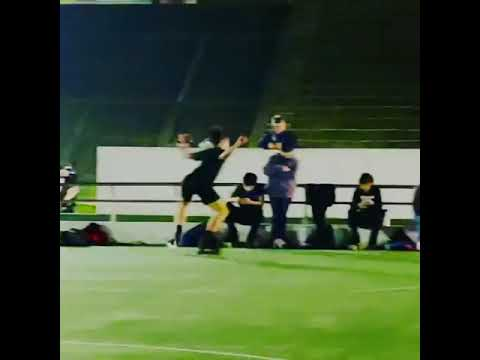

In [ ]:
YOUTUBE_ID = 'hEp8GvorLyQ'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video and crop it:

In [ ]:
!rm -df youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 10 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4

[youtube] hEp8GvorLyQ: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 1.01MiB in 00:00
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis -

Execute pose detection on the cropped video (this could take a while):

In [ ]:
import cv2
import numpy as np
from utilitys import plot_keypoint, PreProcess
from lib.core.inference import get_final_preds
import torch
import config
import models
from config import cfg, update_config
from types import SimpleNamespace


update_config(cfg,
              SimpleNamespace(cfg = join(project_name, 'experiments/coco/hrnet/w48_256x192_adam_lr1e-3.yaml'),
                              opts = '',
                              modelDir='', logDir='', dataDir='', prevModelDir=''))
def model_load(config):
  model = models.pose_hrnet.get_pose_net(config, is_train=False)
  model_file_name  = join(project_name, 'models/pytorch/pose_coco/pose_hrnet_w48_256x192.pth')
  state_dict = torch.load(model_file_name)
  from collections import OrderedDict
  new_state_dict = OrderedDict()
  for k, v in state_dict.items():
      name = k # remove module.
      new_state_dict[name] = v
  model.load_state_dict(new_state_dict)
  model.eval()
  return model
pose_model = model_load(cfg).cuda()

from lib.detector.yolo.human_detector import human_bbox_get as yolo_det
from lib.detector.yolo.human_detector import load_model as yolo_model
human_model = yolo_model()

video_capture = cv2.VideoCapture()
if video_capture.open('video.mp4'):
  width, height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps = video_capture.get(cv2.CAP_PROP_FPS)
  !rm -f output.mp4 output.avi
  # can't write out mp4, so try to write into an AVI file
  video_writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*'MJPG'), fps, (width, height))
  while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
      break
      
    start = time.time()
    
    try:
      bboxs, scores = yolo_det(frame, human_model)
      # bbox is coordinate location
      inputs, origin_img, center, scale = PreProcess(frame, bboxs, scores, cfg)
      
      with torch.no_grad():
        # compute output heatmap
        inputs = inputs[:,[2,1,0]]
        output = pose_model(inputs.cuda())
        # compute coordinate
        preds, maxvals = get_final_preds(
            cfg, output.clone().cpu().numpy(), np.asarray(center), np.asarray(scale))

      image = plot_keypoint(origin_img, preds, maxvals, 0.1)
      video_writer.write(image[:,:,::-1])
    except:
      print("no pose detected!")
      video_writer.write(frame)
    
    end = time.time()
    print("time: {}s, fps: {}".format(end-start, 1/(end-start)))
    
  video_capture.release()
  video_writer.release()
  
  !ffmpeg -y -loglevel info -i output.avi output.mp4
else:
  print("can't open the given input video file!")

Loading network.....
Network successfully loaded
time: 0.23350095748901367s, fps: 4.282637684888511
time: 0.1777184009552002s, fps: 5.626879347468826
time: 0.15232539176940918s, fps: 6.564893668639331
time: 0.15517663955688477s, fps: 6.44426894960191
time: 0.15532493591308594s, fps: 6.438116289064898
time: 0.1501314640045166s, fps: 6.660828938362418
time: 0.1511247158050537s, fps: 6.617051318660342
time: 0.15094208717346191s, fps: 6.6250574556505555
time: 0.1526939868927002s, fps: 6.549046366198502
time: 0.15395665168762207s, fps: 6.495334816900274
time: 0.15280461311340332s, fps: 6.544305041745396
time: 0.153367280960083s, fps: 6.5202955528713495
time: 0.1511058807373047s, fps: 6.617876121833306
time: 0.15358209609985352s, fps: 6.5111756213421925
time: 0.15267467498779297s, fps: 6.549874758730971
time: 0.1515641212463379s, fps: 6.597867567712118
time: 0.15205717086791992s, fps: 6.576473797928419
time: 0.15763616561889648s, fps: 6.343721924939577
time: 0.15529441833496094s, fps: 6.4393

Finally, visualise the result (note that the video is also stored in the current workspace and can be downloaded):

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

Take away:


*   Multiple people can be tracked simultaneously
*   Processing time is reasonably fast
*   Computing joint angles in 2D is easy from here
*   Performance is likely better with OpenPose
*   Using Colab, you don't necessarily need your own hardware




